<a href="https://colab.research.google.com/github/OJB-Quantum/Maxwell-Boltzmann-Distribution/blob/main/fermion_number_qwell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# EE 5163 Fall 2024
# This program calculates the total number of fermions in a 1D quantum well of length L
# Install numpy and matplotlib libraries to use it
# pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

Modify the script to result in the entire list of the energy levels and the Fermi Distribution as it changes from 1 to 0 at an energy level of 0.94 eV (where it equals 1 on the Fermi Distr.) and an energy level of 1.13 eV (where it equals 0 on the Fermi Distr.).

E_1 should be 0.0094 eV and E_11 should be 1.13 eV, everything else in between can be referenced from the snapshot of the whiteboard.

Should push up the Fermi energy to increase the number of electrons in something like

In [8]:
# Constants
# g_some number or gn = degeneracy representing the total possible states (usually up spin and down spin or angular momentum).
k_B = 1.380649e-23 # in J/K
hbar = 6.626070e-34/(2 * np.pi) # in J.s
q0 = 1.602e-19 # fundamental charge in C
m = 9.109e-31 # electron rest mass in kg

# Parameters
m_eff = 0.1*m # effective mass in kg
EF = 1 * q0 # Fermi level in Joules
L = 20e-9 # Well width in meters. Think of this as the size of your quantum dot.

def energy_level(n, L):
    """Calculate the energy of the nth level in a 1D quantum well of length L."""
    return (n**2 * np.pi**2 * hbar**2) / (2 * m_eff * L**2)

def fermi_dirac(E, EF, T):
    """Fermi-Dirac distribution function."""
    return 1.0 / (np.exp((E - EF) / (k_B * T)) + 1)

def calculate_total_fermions(L, EF, T, max_n=1000):
    """Calculate the total number of fermions in the well."""
    total_fermions = 0
    for n in range(1, max_n + 1):
        En = energy_level(n, L)
        gn = 2
        occupation = gn * fermi_dirac(En, EF, T)
        total_fermions += occupation

        # Stop if the energy level is significantly higher than EF
        # if En > EF + 50 * k_B * T:
        #     break

    return total_fermions

    # (# symbol means the number of electrons at each energy level).

In [6]:
# This portion calculates the total number of Fermions in the system at temperature T and Fermi level E_F
plt.rcParams['figure.dpi'] = 500

T1 = 0.01 # temperature in K
T2 = 1000
N_fermi1 = calculate_total_fermions(L, EF, T1, max_n=1000)
N_fermi2 = calculate_total_fermions(L, EF, T2, max_n=1000)

print(f"There are {N_fermi1} fermions in the 1d quantum well with EF = {EF/q0} eV and length L = {L*1e9} nm")
print(f"There are {N_fermi2} fermions in the 1d quantum well with EF = {EF/q0} eV and length L = {L*1e9} nm \n \n")

Nlvl = 20
energies = [en for en in range(1,Nlvl)]

print(f"First {Nlvl} energy levels: \n")
for i in energies:
    e_n = energy_level(i,L)
    print(f"E{i} = {e_n/q0} eV")


There are 20.0 fermions in the 1d quantum well with EF = 1.0 eV and length L = 20.0 nm
There are 19.56187697244321 fermions in the 1d quantum well with EF = 1.0 eV and length L = 20.0 nm 
 

First 20 energy levels: 

E1 = 0.009402186186900287 eV
E2 = 0.03760874474760115 eV
E3 = 0.08461967568210259 eV
E4 = 0.1504349789904046 eV
E5 = 0.23505465467250716 eV
E6 = 0.33847870272841035 eV
E7 = 0.4607071231581141 eV
E8 = 0.6017399159616184 eV
E9 = 0.7615770811389233 eV
E10 = 0.9402186186900287 eV
E11 = 1.1376645286149347 eV
E12 = 1.3539148109136414 eV
E13 = 1.5889694655861484 eV
E14 = 1.8428284926324563 eV
E15 = 2.1154918920525643 eV
E16 = 2.4069596638464734 eV
E17 = 2.717231808014183 eV
E18 = 3.0463083245556932 eV
E19 = 3.394189213471003 eV


<ipython-input-3-40a8b5b947e8>:19: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp((E - EF) / (k_B * T)) + 1)


<ipython-input-3-40a8b5b947e8>:19: RuntimeWarning: overflow encountered in exp
  return 1.0 / (np.exp((E - EF) / (k_B * T)) + 1)


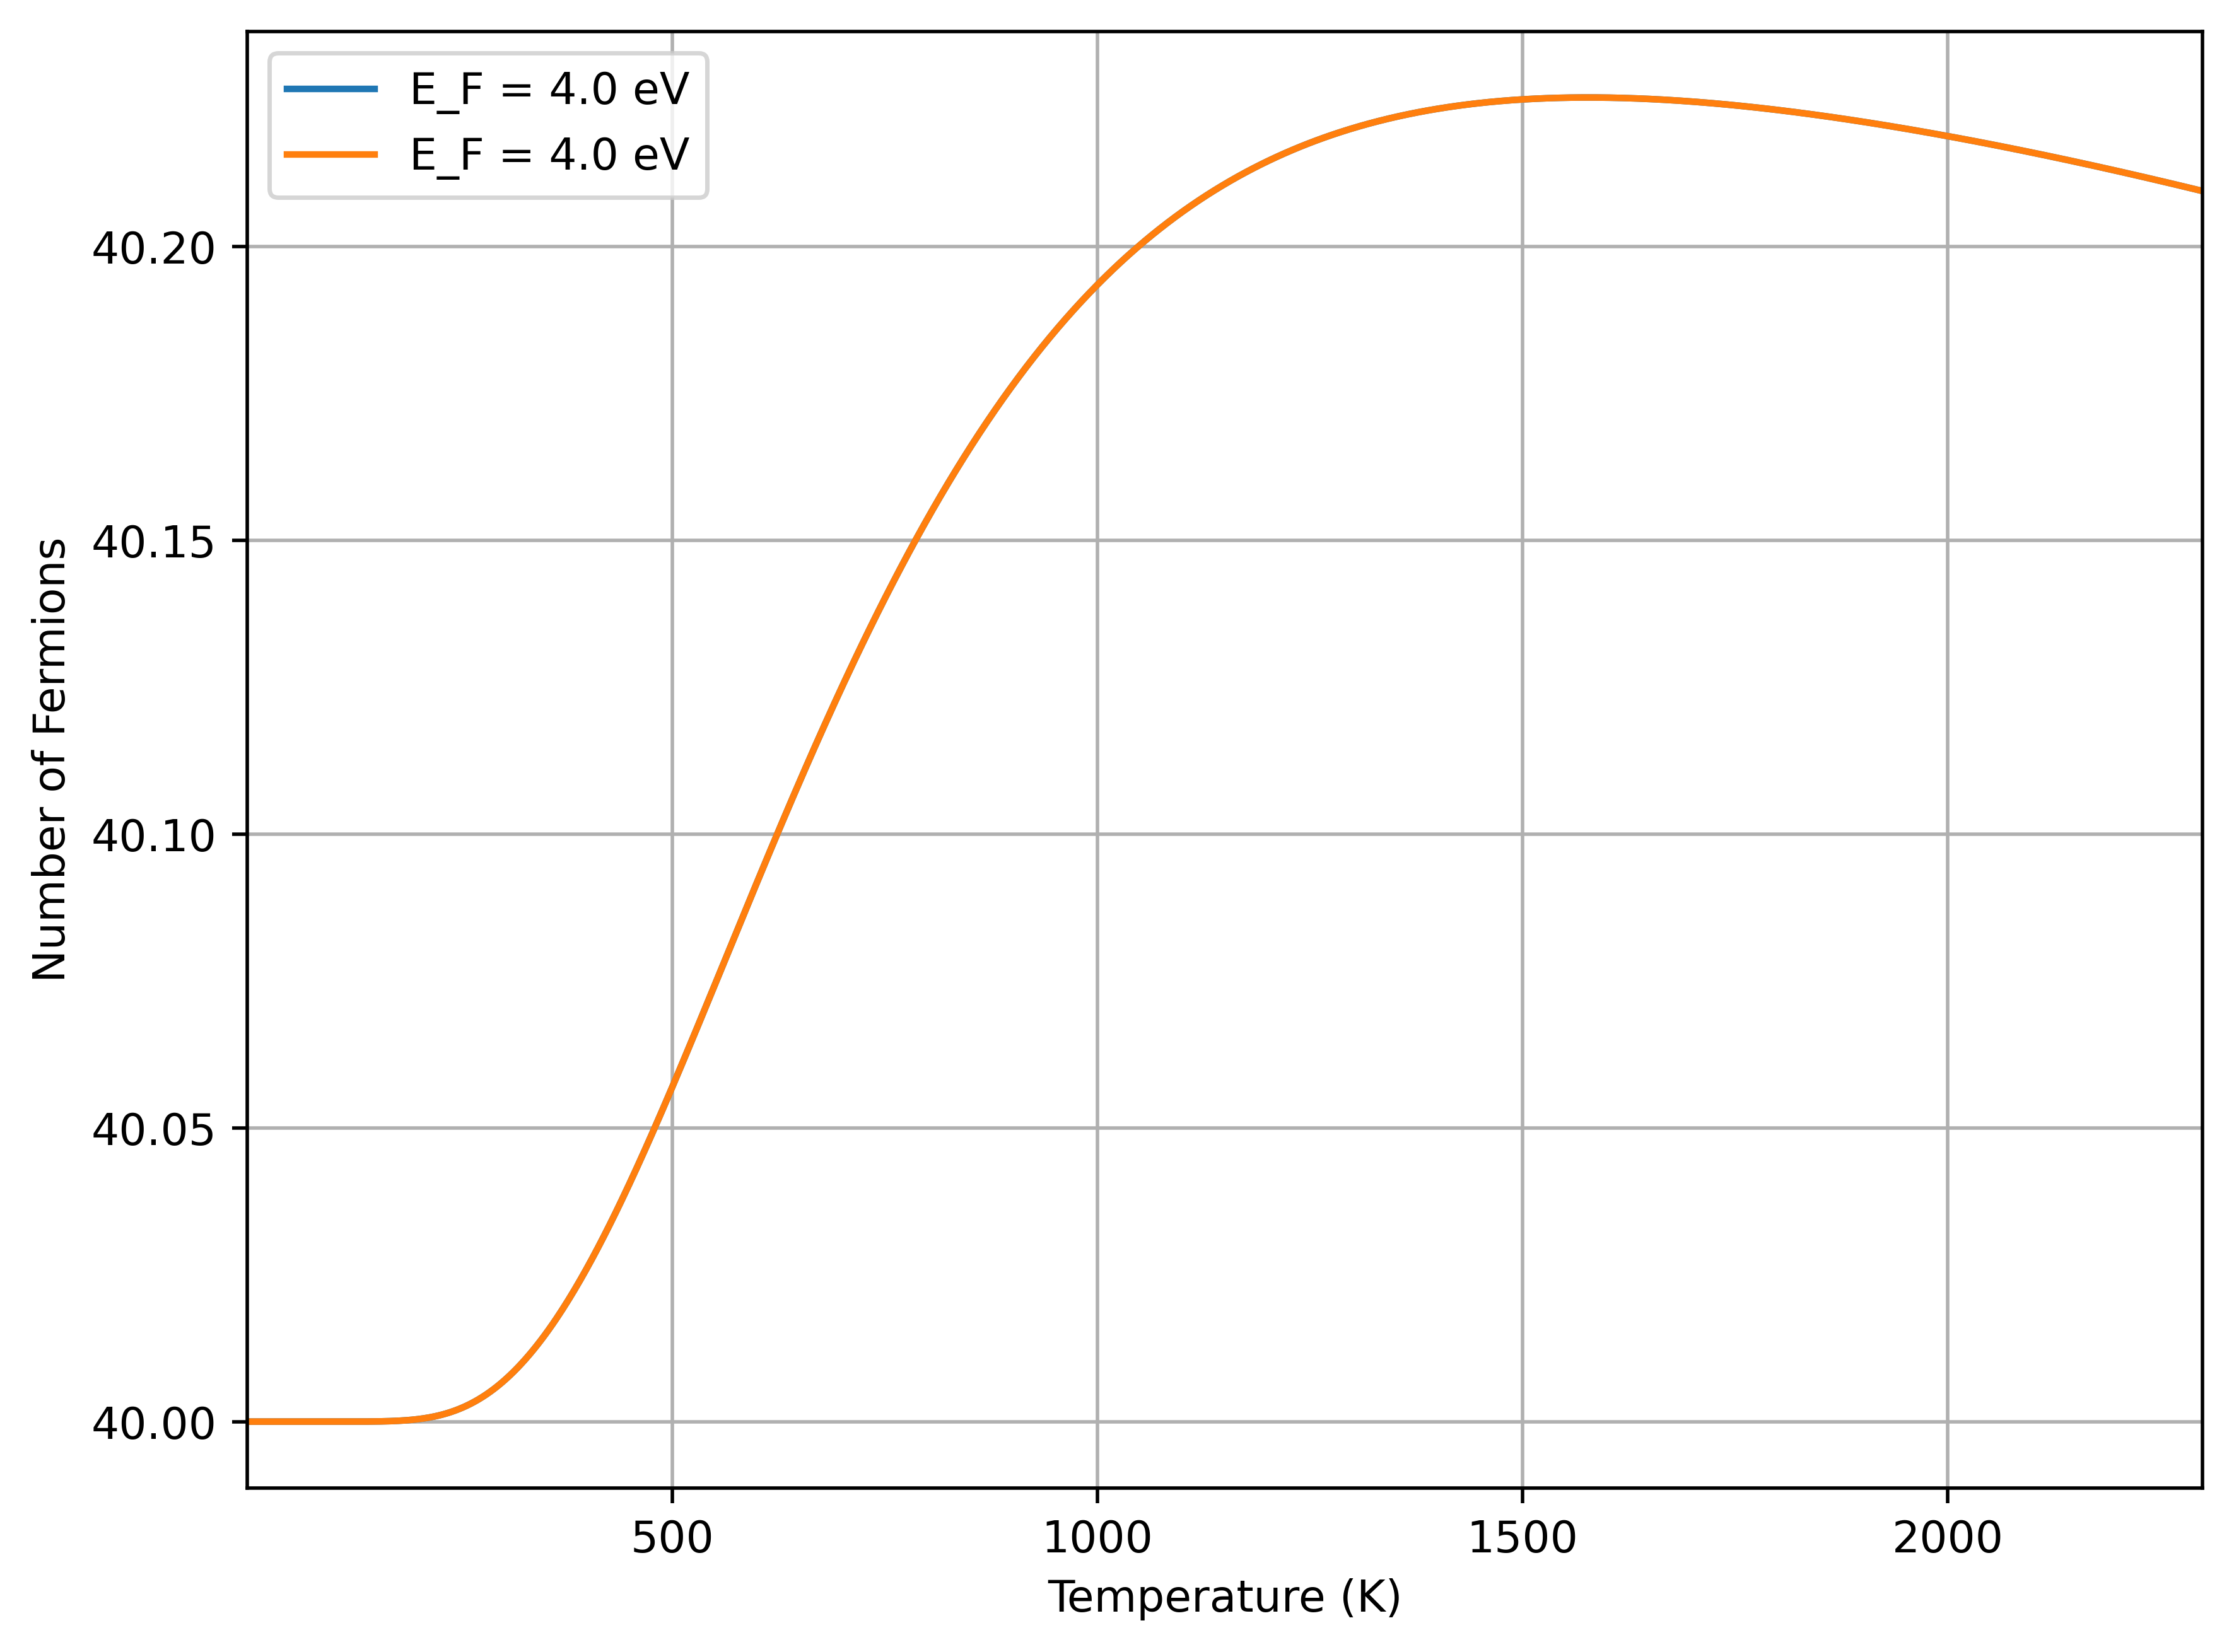

In [7]:
def plot_fermions_vs_temperature(L, EF1, EF2, T_min, T_max, num_points):
    """Plot the number of fermions as a function of temperature."""
    temperatures = np.linspace(T_min, T_max, num_points)
    fermion_counts1 = []
    fermion_counts2 = []

    for T in temperatures:
        fermion_count1 = calculate_total_fermions(L, EF1, T)
        fermion_count2 = calculate_total_fermions(L, EF2, T)
        fermion_counts1.append(fermion_count1)
        fermion_counts2.append(fermion_count2)

    plt.figure(figsize=(8, 6))
    plt.plot(temperatures, fermion_counts1, label=f"E_F = {EF1/q0} eV")
    plt.plot(temperatures, fermion_counts2, label=f"E_F = {EF2/q0} eV")
    plt.xlabel("Temperature (K)")
    plt.ylabel("Number of Fermions")
    # plt.ylim(0,20)
    plt.xlim(T_min, T_max)
    # plt.title(f"Number of Fermions vs Temperature (EF = {EF/q0} eV)")
    plt.grid(True)
    plt.legend()
    plt.show()

# Parameters for the temperature range
T_min = 1e-3   # Minimum temperature in Kelvin
T_max = 2300    # Maximum temperature in Kelvin
num_points = 1000  # Number of temperature points

# Plot the number of fermions as a function of temperature
EF1 = 4 * q0;
EF2 = 4 * q0;

plot_fermions_vs_temperature(L, EF1, EF2, T_min, T_max, num_points)